## Clustering Analysis

- a category of __unsupervised learning__ techniques that allows us to __discover hidden structures in data__ where _we do not know the right answer upfront._


- The __Goal__ of __clustering__ is to __find a _natural grouping_ in data__ so that items in the same clusters are more similar to each other than to those form different clusters.

We will learn about following concepts:

1. Finding centers of similarity using the popular k-means algorithm.
2. Taking a bottom-up approach to building hierarchical clustering trees.
3. Identifying arbitary shapes of objects using a density-based clustering approach.

### Grouping objects by similarity using K-means

__K-means__ widely used in academia as well as in industry.

- __Examples__ of _business-oriented applications of clustering_ include:
1. grouping of documents, music and movies by different topics
2. finding customer that share similar interest based on common purchase behaviors as a basis for recommendation engines.


### K-means clustering using scikit-learn

- _K-means_ algorithm is extremely easy to implement but is __also computationally very efficeint__ compared to other clustering algorithms.
- The _k-means_ algorithm belongs to the category of <font style='color:#822879'>__prototype based clustering__</font>. 

- Prototype-based clustering means that each cluster is represented by a prototype which can either be the _ __centroid__(average) of similar points with continuous features_ or the __medoid__ (the most _representative_ or most frequently occuring point) in the case of categorical features.
- <font style='color:#822879'>_k-means_ is very good at __identifying clusters with a spherical shape__</font> , one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, _k, a priori _.

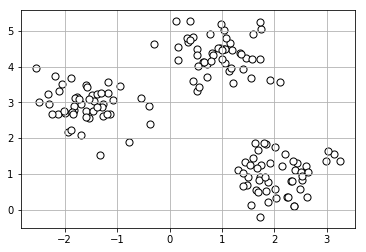

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

K-means algorithm can be summarized by the following four steps:

1. Randomly pick _k_ centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid $\mu ^{(j)}, j \space \epsilon \space \{1, ...,  k\}.$
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

_ how do we measure similarity between objects?_

We can define similarity as the opposite of distance for clustering samples with continuous features is the __squared Euclidean distance__ between two points __x__ and __y__ in _m_-dimensional space:

<center>$ d(x, y)^2 = \sum_{j=1}^{m}(x_j \space - \space y_j)^2 \space = \space ||x-y||_2^2$</center>


Based on this Euclidean distance matrix, we can describe the k-means algorithm as a simple optimization problem an iterative approach for  minimizing the within-cluster __Sum of Squared Errors (SSE)__, which is sometimes also called __cluster inerita__:

<center>$SSE = \sum_{i=1}^n\sum_{j=1}^k \space w^{(i \space, \space j)} \space || x^{(i)} - \mu ^{(j)}||_2^2$</center>


_Here_; i refers to _sample index_ and j to _cluster index_ <br>
$\mu^{(j)}$ is the representative point (centroid) for cluster j, and <br>
$w^{(i \space, \space j)} $ = 1 if the sample $x^{(i)}$ is in cluster j; $w^{(i \space, \space j)} $ = 0 otherwise

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol= 1e-04,
           random_state=0)

y_km = km.fit_predict(X)

we set number of desired clusters to 3, set _n-iter_ =10 to frun the k-means clsuteirng algorithms 10 times independently with different random centroiods to choose the fnal model as the one with the lowest SSE. _max-iter_ parameter , we psecify the maximum number of iterations for each singel run(here 300). 

__Note__ that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reched. However it is possible that k-means does not reach convergence ffor a particular run, whcih can be problematic(computationally expensvie) if we hose realtively large values for _max-iter_. One way to deal with convergecen problemw is to choose large valrues for _tol_,  which is a pratameter that controls the tolearance with regard to the changes in the within-cluster sum-squared-error todeclare convergence. In the preceding code, we chose a toelarna of _1e-04_(=0.0001)



A problem with k-means is that one or more cluster can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means. However, this problem is accounted for in the current k-means implementation in scikit-learn. If a cluster is empty, the algorithm will search _for the sample that is farthest away from the centroid of the empty cluster . Then it will reassign the centroid to be this farthest point._


<br>
<font style='color:#822879'>_When applying k-means for real-world data using a Euclidean distance metic , we want ot make sure that the features are measured on the same scale and apply z-score standarization or min-max scaling _</font>

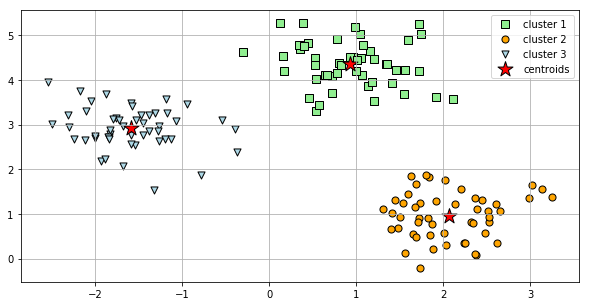

In [9]:
plt.figure(figsize= (10,5))
plt.scatter(X[y_km ==0, 0], X[y_km ==0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km ==1, 0], X[y_km ==1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km ==2, 0], X[y_km ==2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Althoug k-means worked well on this toy datase. We shall highlight the drawback of k-means:
<font style='color:#822879'>
1. we have to specify the number of clsuter k, _a priori._<br>
2. the other properties of k-means are that __clsuters do not overlap and are not hierarchical__ and __we also assume that there is at least one item in each cluster.__
</font>

### A smarter way of placing the initial cluste centroid using k-means++

the classic k-means algorithm that uses a rano seed to place the initial centoids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly.

- One way to address this issue is to run the k-means algorithm multiples times on a dataset and choose the beset performing model in terms of the SSE.

- Another strategy is to place the initial centroids far ways fom each other via the k-means++ algorihtms, which leads to better and more consistent results than the classic k-means


<br>
The initlaisztion in k-mens++ can be summarized as follows:
1. Initialize an empty set __M__ to store the _k_ centroids being selected.
2. Randomly choose the first centroid __$\mu^{(i)}$__ from the input sampels and assign it to __M__.
3. For each sample $x^{(i)}$ that is not in __M__, find the minimumm squared distance $d(x^{(i)}, M)^2$ to any of the centorids in __M__.
4. To randomly select the next centroid __$\mu ^{(\rho )}$,__ use a weighed 
<center>probaility distribution equal to $ \frac {d(\mu ^{(\rho )} \space , \space M)^2}{\sum_i d(x ^{(i)} \space , \space M)^2}$ </center>

5. Repeat steps 2 and 3 until _k_ centroids are chosen.
6. Proceed with the classic k-means algorithm.

To use k-means_++_ with scikit-learn's _KMeans_ object , we just need to set the _init_ parameter to '_k-means++'_ In fact 'k-means++' is the default argument to the _init_ parameter. which is strongly recommended in  practice.

## Hard versus Soft Clustering

__Hard Clustering__ descirbes a faimly of algorithms where each sample in a dataset is assigned to exactly one cluster, as in the k-means algorithm that we discussed in the previous sections.
<br><br>
In contrast, algorithm for __soft clustering__(sometimes also called __fuzzy clustering__) assign a sample to one or more clsuters. A popular example of soft clustering is the __fuzzy C-means (FCM)__ algorithm (also called __soft k-means__ or __fuzzy k-means__).


The FCM procedure is very similar to K-means. However, we replace the hard cluster assignment with probabilities for each point belonging to each cluster. In k-means we could express the cluster membership of a sample _x_ with a sparse vector of binary values:

<center>$
\begin{bmatrix}
\mu^{(1)} \rightarrow 0 \\
\mu^{(2)} \rightarrow 1 \\
\mu^{(3)} \rightarrow 0
\end{bmatrix}
$</center>

In __contrast__ , a membership vector in FCM could be repesented as follows:

<center>$
\begin{bmatrix}
\mu^{(1)} \rightarrow 0.10 \\
\mu^{(2)} \rightarrow 0.85 \\
\mu^{(3)} \rightarrow 0.05
\end{bmatrix}
$</center>


Here, each value falls in the range $[0,1]$ and represents a probability of membership of the respective clsuer centroid. The sum of the memberships for a given sample is equal to 1. FCM algorithm can be summarized in four key steps:

1. Specify the number of _k_ centroids and randomly assign the cluster memberships for each point.
2. Compute the clsuter centroids $\mu^{(j)}, \space \epsilon \{1,...,k\}$
3. Update the cluster memberships for each point.
4. Repeat steps 2 and 3 until the membership coefficients do not change or a user defined tolerance or maximum number of iterations is reached.


The objective function of FCM - we abbreviate it as $J_m$ - looks very similar to the within-clsuter sum-squared-error that we minimized in k-means


<center>$J_m = \sum_{i=1}^n\sum_{j=1}^k \space w^{m(i \space, \space j)} \space || x^{(i)} - \mu ^{(j)}||_2^2$</center>


However, the membership indicator $w^{m(i \space, \space j)}$ is not a binary value as in k-means ($w^{m(i \space, \space j) \epsilon \{0,1\}}$), but a __real__ value that denotes the clsuter membership probability ($w^{m(i \space, \space j) \epsilon \{0,1\}}$). You also may have notices that we added an additional exponent to $w^{m(i \space, \space j)}$; the exponent _m_, any number greater than or equal to one (typically _m=2_) is the so-called __fuzziness coefficient__(or simply __fuzzifier__) that controls the degree of _fuzziness_. The larger the value of _m_ the smaller the cluster membership $w^{m(i \space, \space j)}$ becomes, which leads to fuzzier clusters. The cluster membership probability itself is calculated as follows:

### Using the elbow method to find the optimal numbe of clusters

One of the main challenges of unsupervised learning, is that we do not know the definitive answer. 
- Thus in order to evalutate the performance of a supervised model, to quantify the quality of clustering, we need to use intrinsic metrics - such as the within-cluster SSE (distortion) that we discussed earlier in the chapter - to compare the performance of different k-means clusterings. 

- In scikit-learn , it is accessible via the _inertia-_ attribute after fitting a _KMeans_ model:

In [10]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


- Based on the within-cluster SSE,  we can use a graphical tool, the so-called __Elbow method__, to estimate the optimal number of clusters _k_ for a given task.

The idea behind the elbow method is to identify the value of _k_ where hte distortion begins to increase most rapidly, which will become clearer if we plot the distortion for different values of _k_:

In [12]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++', #note the initialization is not random
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

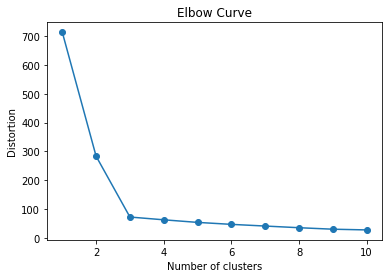

In [14]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

### Quantifying the quality of clustering via silhouette plots

Another intrinsic metric to evaluate the quality of a clustering is __silhouette analysis__, which __can also be appled to clustering algorithm other than k-means__.
Silhouette analysis can be used as a graphical tool to __plot a measure of how tightly grouped the samples in the cluster are__. <br>
<br>To calculate the __silhouette coefficient__  of a single sample in our dataset, we can apply the following three steps:
1. Calculate the <font style='color:#822879'>__cluster cohesion__ $a^{(i)}$ </font>as the __average distance between a simple $x^{(i)}$ and all other points in the same cluster.__
2. Calculate the <font style='color:#822879'>__cluster separation__ $b^{(i)}$ </font>from the next closest cluster as the __average distance between a sample $x^{(i)}$ and all samples in the nearest cluster.__ 
3. Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two as shown here:

<center>$\begin{equation*} s^{(i)} = \frac {b^{(i)} \space  - \space  a^{(i)}}{ max \space \{ \space b^{(i)}\space , \space a^{(i)} \space  \}} \end{equation*}$</center>


- The silhouette coefficient is bounded in the range -1 to 1. Based on the preceding equation, we can see that the silhouette coefficient is 0 if the cluster separation and cohesion are equal ($b^{(i)} \space  = \space  a^{(i)}$). Furthuremore, we get close to an ideal __silhouette coefficient__ of 1 if $b^{(i)} \space  >> \space  a^{(i)}$, since $b^{(i)}$ quantifies how dissimilar a sample is to other clsuters, and $a^{(i)}$ tells us how similar it is to the other samples in its own cluster.

In [15]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

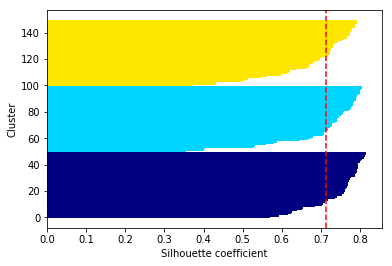

In [19]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0,0
y_ticks= []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different clusters and identify cluster that contains outliers.

However. we can see in the preceding silhouette plot, the silhouette coefficients are not even close to __0__, which is in this case __an indicator of a good clustering__. Furthuremore, to summarize the goodness of our clustering, we added the average silhouette coefficient to the plot(dotted line)

To see what a silhuette plot looks like for a relatively _bad_ clustering, et's eed the k-meand algorhtm with only two centroids

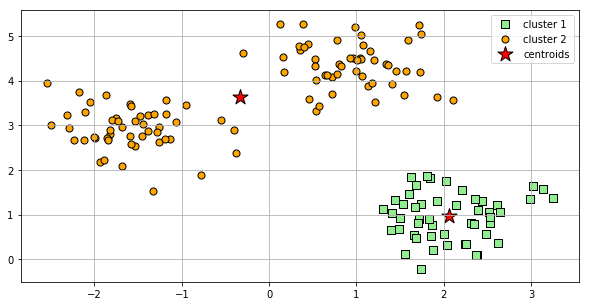

In [5]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

plt.figure(figsize= (10,5))
plt.scatter(X[y_km ==0, 0], X[y_km ==0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km ==1, 0], X[y_km ==1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

As we can see one of the centroid falls between two of the three spherical groupings of the samples points.

- although the clustering does not look completely terrible, it is suboptimal

Typically we do not hve the luzury of visualizing datasets in two-deiensional scatterplots in real-world problems, since we typically work with data in higher-dimensions.
- So, next, we create the silhouette plot to evaluate the results:

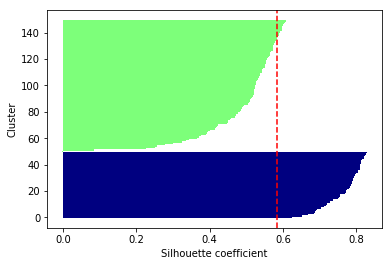

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0,0
y_ticks= []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

We can see in the resulting plot above, the silhouettes now have visibly different lengths and widths, which is evidence for a relativerly _bad_ or at least _suboptimal_ clustering.

## Organizing clusters as a hierarchical trees

An alternative approach to prototype-based clustering: __Hierarchical clustering__. One advantage of hierarchical clustering algorithms is that it allows us to plot __dendogram__, which can help with the interpretation of the results by creating meaningful taxonomies. another useful advantage of this hierarchical approach is that we do not need to specify the number of clusters up front.

- The two main approaches of hierachical clustering are __agglomerative__ and __divisive__ hierarchical clustering.
1. In __divisive hierarchical clsutering__, <font style='color:#822879'>we start with one cluster that encompasses all our smaplesm and we iterativelry split the cluster into smaller clusters until each cluster only contains one sample.</font>

2. We will focus on __Agglomerative Clustering__ , which takes the oppposite approach. <font style='color:#822879'>We start with each sample as an individual clsuter and merge the closest pairs of clusters until only one cluster remains.</font>

### Grouping clusters in bottom-up fashion

The two standard algorithm for agglomerative hierarchical clustering are __single linkage__ and __complete linkage__
- Using __single linkage__, we <font style='color:#822879'>compute the distance between the most similar members for each pair of clusters and merge the two clsuters</font> for which the distance between the most similar members is the smallest.
- The __complete linkage__ approach is similar to single linkage but, <font style='color:#822879'>instead of comparing the most similar members in each pair of clusters we compare the most dissimilar members</font> to perform the merge.


![grouping.png](grouping.png)

__Credits__ : Sebastian Raschka -python machine learning

> Other commonly used algorithms for agglomerative hierarchical clustering include __average linkage__ and __Ward's Linkage__. In average linkage, we merge the cluster pairs based on the minimum average distances between all group members in the two clusters. In ward's linkage, the two clsuters that lead to the minimum increase of the total within-cluster SSE are merged.

Hierarchical complete linkage clustering is an iterative procedure that can be summrized by the following steps:

1. Compute the distance matrix of all samples.
2. Represent each data point as a singleton cluster.
3. Merge thetwo closest clusters based on the distance between the most dissimilar (distant) members.
4. Update the similarity matrix.
5. Repeat steps 2-4 until one single cluster remains.


In [12]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0', 'ID_1', 'ID_2','ID_3', 'ID_4']

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Performing hierarchical clustering on a distance matrix

To calculate the distnce matrix as input for the hierarchical clsutering algorithm, we will use the _pdist_ frunction from SciPy's _spatial.distance_ submodule:

In [13]:
from scipy.spatial.distance import pdist, squareform


- We have 5 observations thus pairwise distance is $ ^5C_2$ and thus shape of pdist is (10,)

In [16]:
pdist(df, metric='euclidean')

array([ 4.973534  ,  5.51665266,  5.89988504,  3.83539555,  4.34707339,
        5.10431109,  6.69823298,  7.24426159,  8.31659367,  4.382864  ])

In [18]:
pdist(df, metric='euclidean').shape

(10,)

In [19]:
squareform(pdist(df, metric='euclidean'))

array([[ 0.        ,  4.973534  ,  5.51665266,  5.89988504,  3.83539555],
       [ 4.973534  ,  0.        ,  4.34707339,  5.10431109,  6.69823298],
       [ 5.51665266,  4.34707339,  0.        ,  7.24426159,  8.31659367],
       [ 5.89988504,  5.10431109,  7.24426159,  0.        ,  4.382864  ],
       [ 3.83539555,  6.69823298,  8.31659367,  4.382864  ,  0.        ]])

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                       columns=labels, index=labels)

Using the precedin code, we calculated the _Euclidean distance_ betwen ech pair of sample points ino ur datset based on the features _X,Y,_ and _Z_. We provided the condensed distance matrix - returned by _pdist_ - as input to the _squareform_ funciton to create a symmetrical matrix of the pari-wise distance as show below:


In [20]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


- Next we will apply the compete linakge agglomeration to our clustersusing the _linkage_ function from Scipy's __cluster.hierarchy__ submodule, which returns a so-called __linkage matrix__

- Before we call the _linkage_ function, let us take a careful look at the fuction documentation:

In [21]:
from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
  

Based on the function description, we conclude theat we can use a condensed distance, matrix (upper tirangular) from the _pdist_ function as an input attribute. Alternativelery we could also provide the intiial data array and use the _'euclidean'_ metric as a function argument in _linkage_. However we should not use the _squreform_ distiance matrix that we deined earlier , since it would yield different idstance values than expected.
- To sum it up, the three possible secnarios are listed here:

- __Incorrect approach__: Using the _squareform_ distance matrix shown in the follwoing code snipped would lead to incorrect result:

In [ ]:
# NOT TO BE EXECUTED FOR REFENCE OF INCORRECT APPROACH
from scipy.custer.hierarchy import linkage
row_cluster = linkage(row_dist, method='complete', metric='euclidean')

- __Correct approach__: Using the condensed idstance matrix as shown in the follwoing code exxample yields the correct pariwise diatnace matrix:

In [24]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

- __Correct approach__: Using ghe complete input smaple matrix as whon in the follwign code snippet also leads to a correct distanc matrix similar to the prededing approach;

In [25]:
row_clusters = linkage(df.values, metric='euclidean', method='complete')

To take a closer look at the clusteirng results, we can turn clustering results into a pandas _DataFrame_ as follows:

In [27]:
pd.DataFrame(row_clusters,
            columns= ['row label 1',
                     'row label 2',
                     'distance',
                     'no. of items in clust.'],
             index = ['cluster %d ' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


The first and second columns denote the most dissimilar members in each clsuter, and the third column reports the distance between those members. The last columns returns the count fo the members in each cluster.

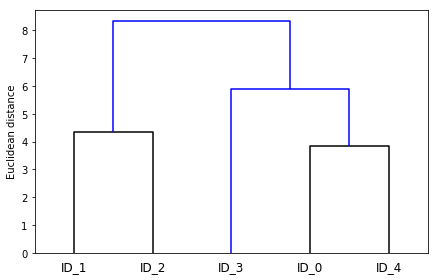

In [31]:
# visualizing the reulst in the form of a dendogram

from scipy.cluster.hierarchy import dendrogram

# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, labels=labels, 
#                        color_threshold= np.inf
                      )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

###  Attaching dendrograms to heat map

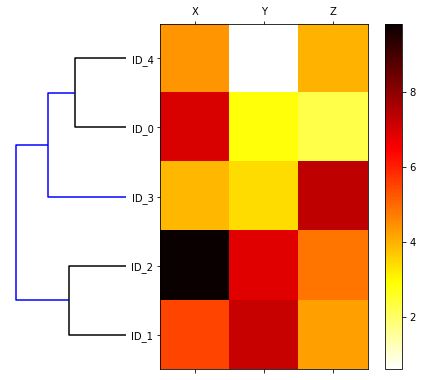

In [34]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])

row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

As we can see, the order of rows in the heat map reflects the clsutiern gof the smaples in the dendotram. Ind  addition ot a simple dendrogram, the color-coded values of each smaple and featue in the heat map provide us with a nice summary of the dataset.

### Apply agglomerative clsutierng via scikit-learn

There is also an _AgglomerativeClustering_ implementation in scikit-learn, which allows us to choose the number of clsuters that we want to return . This is useful if we want ot prune the hierarchical cluster tree.

In [37]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)

Cluster labels: [1 0 0 2 1]


In [38]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)

Cluster labels: [0 1 1 0 0]


### Locating regions of high density via DBSCAN

__Density based spatial clustering of Applictions with Noise(DBSCAN)__, which <font style='color:#822879'>_does not make assumptions about spherical clusters like k-means_ , no does it partition the dataset into hierarchies that require a manual cut-off point.</font> As its name implies, density based clsutering assigns clsuter lables based on dense regions of points.

- In DBSCAN, the notion of density is defined as the number of points within a specified radius $\epsilon$.

According to DBSCAN algorithm, a special labels is assigned to each sample (point) using the following criteria:

1. A point is condisdered a __core point__ if at least a specified number (MinPts) of neighboring pints fall within the specified radius $\epsilon$

2. A __border point__ is a point that has fewer neighbors than MinPts within $\epsilon$, but lies withing the $\epsilon$  radius of a core point.

3. All other points that are neighter core nor border points aer considered __noise points__.

After labeling the poinst as core, border, or noise, the DBSCAN algorithm can be summarizzedin two simple steps:
1. Form a separate cluster foreach core pint or connected group of croe points (core ponts ar connected if they areno farhter away than $\epsilon$).
2. assing each border piont to the cluster of its corresponding core point.


![Dbscan.png](Dbscan.png)

One of the main advantages of using DBSCAN  is that it<font style='color:#822879'> does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to  a cluster but is capable of removing noise points.</font>

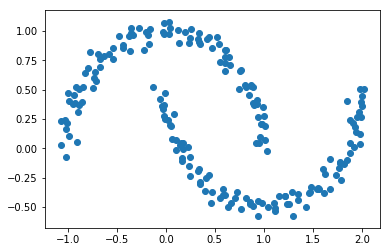

In [41]:
# for illustarvei example, let' create half-moon shaped sturcture to compare k-means, hiearchical, and DBSCAN:

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
                 noise=0.05,
                 random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

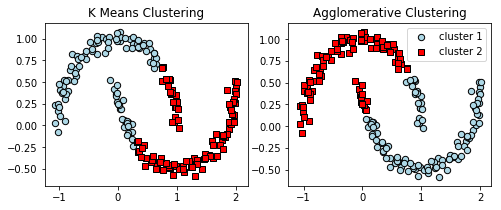

In [44]:
f, [ax1, ax2] = plt.subplots(1,2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0,0], X[y_km == 0,1],
           color='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1,0], X[y_km == 1,1],
           color='red', edgecolor='black', marker='s', s=40, label='cluster 2')

ax1.set_title('K Means Clustering')


ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0,0], X[y_ac == 0,1],
           color='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1,0], X[y_ac == 1,1],
           color='red', edgecolor='black', marker='s', s=40, label='cluster 2')

ax2.set_title('Agglomerative Clustering')

plt.legend()
plt.show()



We can see that the k-means algorithm is unable to separate the two cluster, also the hierarchical clsuteirng algortihm was challenged by those complex shapes.

Finally, let us try the DBSCAN algorithm on this datset to see if it can find he two half-moon-shaped clusters using a density-based approach:

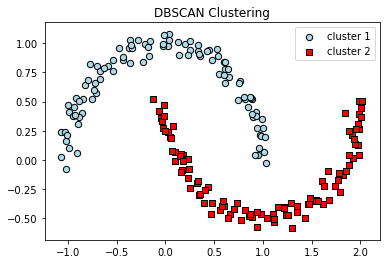

In [47]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, 
           min_samples=5,
           metric='euclidean')

y_db = db.fit_predict(X)


plt.scatter(X[y_db == 0,0], X[y_db == 0,1],
           color='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db == 1,0], X[y_db == 1,1],
           color='red', edgecolor='black', marker='s', s=40, label='cluster 2')

plt.title('DBSCAN Clustering')

plt.legend()
plt.show()



The DBCAN algorithm can succesffully detect eh half-moon shapes, <font style='color:#822879'>which highlights one of the strength of __DBCSAN: clustering data of arbitary shapes__</font>


However, we shall also note some of the disadvantages of DBSCAN. With a increasing number of featue sin our dataset - assuming a fixed number of training examples - the negative effect of the __curse of dimnesionality __ increases. This is especially a pronlem if we are suing the Euclidena distnace metric. However , theproblem fo the _curse of dimensionality_ is not unique to DBSCAN; it also affects other clusteirng algorithms htat use the Euclidean disitance metric, 
In additno , we have two hyperparmeterrs in DBSCAN(MinPts and $\epsilon$) that need to be optmized ot yild good clsuting results. Finading a good combnation of Minpts and $\epsilon$ can be problemati c if the density differences in the dataset are relatively large.



> We have seen three of most fundamental categories of clsutering algorithms : __prototype-based clsutering with k-means__, __agglomerative hierarchical clsutering, and density based clustering via DBSCAN__.

> However it is worth mentioning a fourth class of more advance clsutering algorithms __graph based clustering__. Probably the most prominent members of the graph-based clutering family are the __spectral clustering__ algorithms. Although there are many different implementations of spectral clustering, they all have in common that they <font style='color:#822879'>__use the eigenvectors of a similarity or distance matrix to derive the cluster relationships.__</font>

### Notes

In practice, it is not always obvious which clustering algorithm will peform best on a given dataset, especially if the data comes in multiple dimensions that makes it hard or impossible to visualize.

- It is important to emphasize that a successful clustering not only depends on the algorithm and its hyperparameters. Rather, the choice of an appropriate distance metric and the use of domain knowledge that can help guide the experimental setup can be even more important.



In the context of the curse of dimensionality, it is thus common practice, to apply dimensionality reduction techniques prior to performing clustering, Such dimensionality reduction techniques for unsupervised datasets include principal component analysis and RBF kernel principal component analysis.

Also, it is particularly common to compress datasets down to two-dimensional subspaces, which allows us to visualize the clusters and assigned labels using two-dimensional subspaces, which allows us to visualize the clusters and assigned labels using two-dimensional scatterplots, which are particularly helpful for evaluating the results.